In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import dfa
import numpy as np
import matplotlib.pyplot as plt
import os
from evaluation import read_result
import plot_util
from utils import *

In [4]:
data_folder = get_data_folder_path()

In [5]:
result_name = os.path.join(data_folder,'critical_states/2022-06-27_c_ee14_c_ei14_results.csv')
data_t, data, dt = read_result(result_name)
print(dt)

1.0


In [19]:
intv = [200,1200]

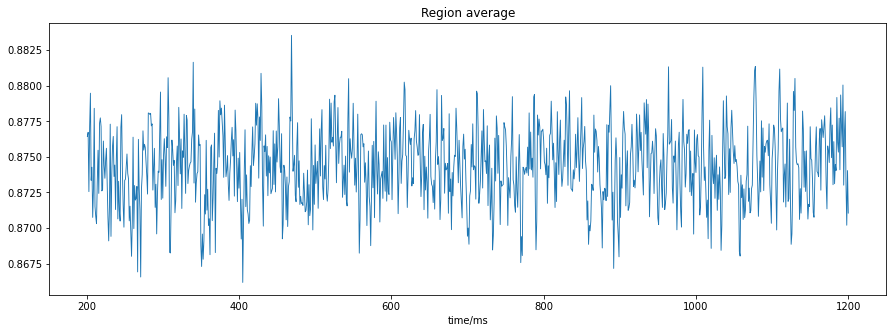

In [14]:
_ = plot_util.plot_result(data_t, data, interval=intv)

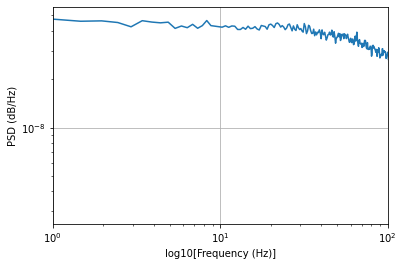

In [15]:
f, Pxxf, = plot_util.plot_psd(data,dt=1,mode='doublelog')

In [11]:
f[1]

0.48828125

In [21]:
raw = dfa.load_data([data])
dfa_exp, _, x, y, model, residual = dfa.compute_DFA(raw, return_fitting=True, l_freq=0.5, h_freq=4)

Creating RawArray with float64 data, n_channels=1, n_times=1000000
    Range : 0 ... 999999 =      0.000 ...   500.000 secs
Ready.


In [22]:
intv1 = [200,800]

In [28]:
filtered, _ = raw[:]
filtered = np.squeeze(filtered)

In [30]:
filtered[intv1[0]]

0.42140938269551637

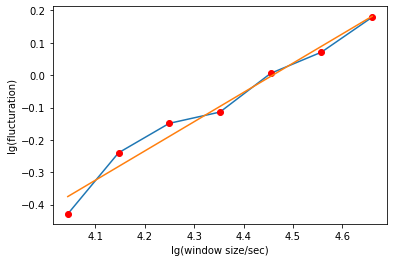

In [8]:
plt.figure()
plt.plot(x,y)
plt.xlabel('lg(window size/sec)')
plt.ylabel('lg(flucturation)')
poly1d_fn = np.poly1d(model) 
plt.plot(x,y, 'ro', x, poly1d_fn(x))
# plt.xlim(0, 5)
# plt.ylim(0, 20)
plt.show()